# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json
# Import API key
from api_keys import weather_api_key
import scipy.stats as st

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
temp=[]
humid=[]
cloud=[]
wind_speed=[]
cityFinal=[]
country=[]
lat=[]
long=[]
datetime=[]

city_id=1
#weather part of the API can't get city_final to append
for city in cities:
    response=requests.get(query_url + city).json()
    try:
        
        cityFinal.append(response['name'])
        temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response ['wind']['speed'])
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        datetime.append(response['dt'])
        print(f"Processing record {city_id} for {city}") 
        
        city_id=city_id+1
        #print("City found appending stats")
    except (KeyError, IndexError): 
        print("City does not exist in weather API")
    
print(f"Data reading complete")

Processing record 1 for bluff
Processing record 2 for la ronge
Processing record 3 for port alfred
Processing record 4 for pochutla
Processing record 5 for whitianga
Processing record 6 for ronneby
Processing record 7 for kavaratti
Processing record 8 for torbay
Processing record 9 for rikitea
Processing record 10 for palmer
Processing record 11 for busselton
Processing record 12 for cidreira
Processing record 13 for new norfolk
Processing record 14 for corinto
Processing record 15 for mar del plata
Processing record 16 for saskylakh
Processing record 17 for praia da vitoria
Processing record 18 for mount gambier
Processing record 19 for ranot
Processing record 20 for mahebourg
Processing record 21 for aksay
Processing record 22 for caborca
Processing record 23 for noumea
City does not exist in weather API
Processing record 24 for khatanga
Processing record 25 for atuona
Processing record 26 for mangai
Processing record 27 for bol
Processing record 28 for puerto ayora
Processing record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
cities_data=pd.DataFrame({
          "City" :cityFinal,
          "Country": country,
          "Latitude": lat,
          "Longitude": long,
          "Date Time": datetime,
          "Temperature": temp,
          "Humidity (%)": humid,
           "Cloudiness (%)": cloud,
           "Wind Speed (mph)": wind_speed
          })
cities_data.head()
cities_data.to_csv(output_data_file)
cities_data.head()

,City,Country,Latitude,Longitude,Date Time,Temperature,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Bluff,NZ,-46.60,168.33,1595011950,35.73,88,25,6.02
1,La Ronge,CA,55.10,-105.28,1595011950,59.00,93,90,9.17
2,Port Alfred,ZA,-33.59,26.89,1595011951,64.76,33,0,9.78
3,Pochutla,MX,15.74,-96.47,1595011951,91.40,49,20,5.66
4,Whitianga,NZ,-36.83,175.70,1595011951,55.53,85,99,9.60


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#  Get the indices of cities that have humidity over 100%.
#double check this
overhumid=[]
for x in cities_data["Humidity"]:
    if x > 100:
        overhumid.append(x)
overhumid

[]

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

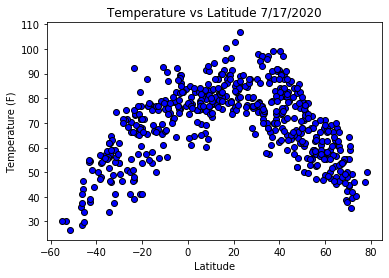

In [23]:
x_axis=cities_data["Latitude"]
y_axis=cities_data["Temperature"]
plt.scatter(x_axis, y_axis, facecolors="blue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs Latitude 7/17/2020")
plt.savefig("output_data/temp.png")

In [ ]:
#This is analyzing the temperature of each city compared to the latitude. Latitudes that are closer to 0 have higher temperatures. 

## Latitude vs. Humidity Plot

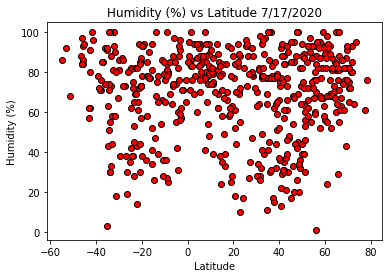

In [24]:
x_axis=cities_data["Latitude"]
y_axis=cities_data["Humidity (%)"]
plt.scatter(x_axis, y_axis, facecolors="red", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity (%) vs Latitude 7/17/2020")
plt.savefig("output_data/humid.png")

## Latitude vs. Cloudiness Plot

In [ ]:
# This is analyzing the humidity of each city compared to the latitude. 
#There really is no consistent correlation between humidity and latitude, however, many of the cities have high humidity. 

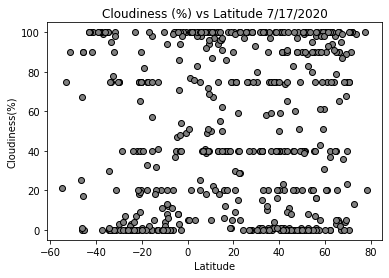

In [25]:
x_axis=cities_data["Latitude"]
y_axis=cities_data["Cloudiness (%)"]
plt.scatter(x_axis, y_axis, facecolors="gray", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("Cloudiness (%) vs Latitude 7/17/2020")
plt.savefig("output_data/cloudiness.png")

## Latitude vs. Wind Speed Plot

In [ ]:
# This is analyzing the cloudiness of each city compared to the latitude. 
#There is no linear relationship between latitude and cloudiness. However,many cities appear to have either 0%, 20%, 40%, 80%, or 100% cloudiness.

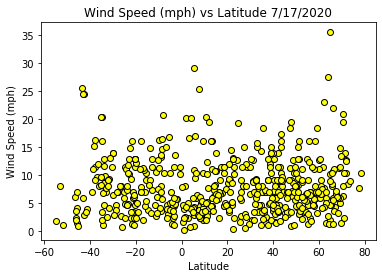

In [26]:
x_axis=cities_data["Latitude"]
y_axis=cities_data["Wind Speed (mph)"]
plt.scatter(x_axis, y_axis, facecolors="yellow", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed (mph) vs Latitude 7/17/2020")
plt.savefig("output_data/wind_speed.png")

## Linear Regression

In [ ]:
#This is analyzing the windspped of each city compared to the latitude. There is no linear relationship, but most cities have windspeed under 20 mph.

In [31]:
# OPTIONAL: Create a function to create Linear Regression plots
# Create Northern and Southern Hemisphere DataFrames
northern_cities=cities_data[(cities_data["Latitude"]>0)]
southern_cities=cities_data[(cities_data["Latitude"]<0)]

def regression(df, x_values, y_values, region):

    x=df[x_values]
    y=df[y_values]
    correlation=st.pearsonr(x, y)
    print(correlation)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    plt.xlabel(x_values)
    plt.ylabel(y_values)
    plt.title(f"{region} {x_values} vs {y_values} 7/17/2020")
    plt.scatter(x, y)
    plt.plot(x, regress_values, "r-")
    plt.savefig(f"output_data/{region} {x_values} vs {y_values}")



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

(-0.6592922735785905, 3.981823009701779e-48)


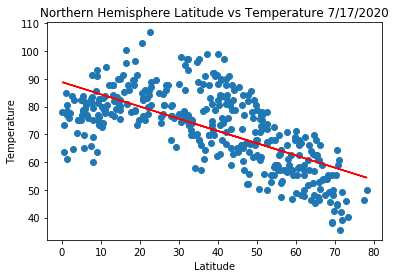

In [32]:
regression(northern_cities, "Latitude", "Temperature", "Northern Hemisphere")

In [ ]:
#This is examining the relationship betwen temperature and latitude in the Northern Hemisphere. The closer the latitude is to 0, 
# the higher the temperature is. This is statistically significant. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

(0.7821783843100789, 1.4701371993115663e-36)


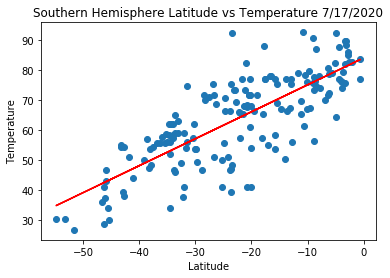

In [33]:
regression(southern_cities, "Latitude", "Temperature", "Southern Hemisphere")

In [ ]:
#This is examining the relationship betwen temperature and latitude in the Southern Hemisphere. The closer the latitude is to 0, 
# the higher the temperature is. This is statistically significant. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

(-0.02977801991616497, 0.5653918998704676)


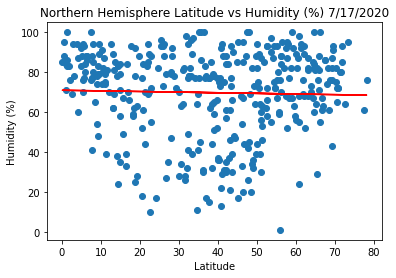

In [34]:
regression(northern_cities, "Latitude", "Humidity (%)", "Northern Hemisphere")

In [ ]:
#This is examining the relationship between humidity and latitude in the Northern Hemisphere. There is no correlation between the two.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

(-0.12595352725131803, 0.10068962742257141)


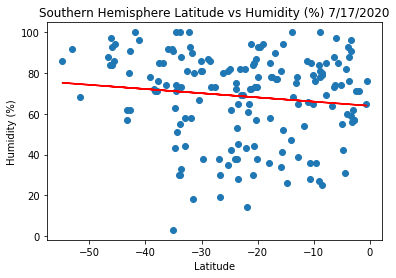

In [35]:
regression(southern_cities, "Latitude", "Humidity (%)", "Southern Hemisphere")

In [ ]:
#This is examining the relationship between humidity and latitude in the Southern Hemisphere. There is no correlation between the two.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

(-0.08758281633578295, 0.0903360549151604)


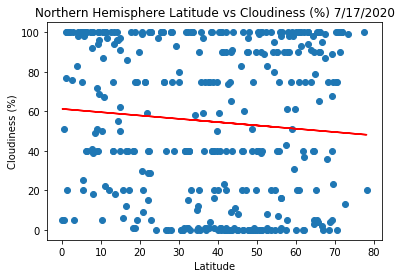

In [36]:
regression(northern_cities, "Latitude", "Cloudiness (%)", "Northern Hemisphere")

In [ ]:
#This is examining the relationship between cloudiness and latitude in the Northern Hemisphere. The correlation is approaching statistical
#significance (p=.09), however the correlation is very small. The data suggests that areas of higher latitude may have fewer clouds, though again
#this is not significant. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

(-0.16850642345956113, 0.02758602201110806)


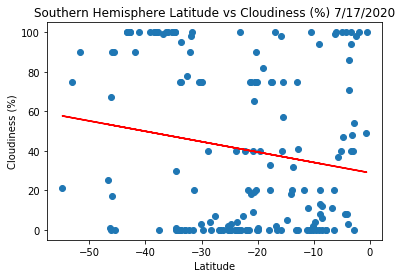

In [37]:
regression(southern_cities, "Latitude", "Cloudiness (%)", "Southern Hemisphere")

In [ ]:
#This is examining the relationship between cloudiness and latitude in the Southern Hemisphere. The correlation statistical
#significance (p=.02), however the correlation is relatively small. The data suggests that areas of higher latitude may have fewer clouds. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

(0.08071537449848616, 0.11867124052345514)


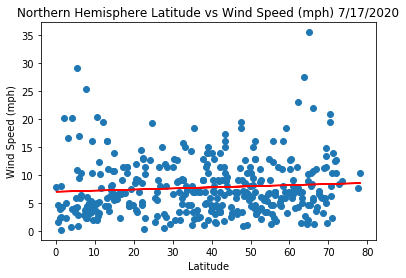

In [38]:
regression(northern_cities, "Latitude", "Wind Speed (mph)", "Northern Hemisphere")

In [ ]:
#This is examining the relationship between wind speed and latitude in the Northern Hemisphere. There appears to be no relationship. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

(-0.03144331707594723, 0.683082888951094)


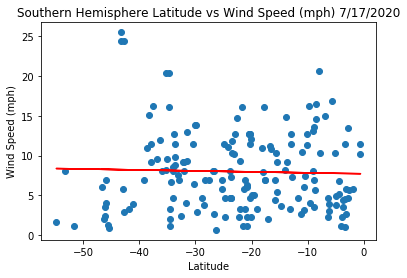

In [39]:
regression(southern_cities, "Latitude", "Wind Speed (mph)", "Southern Hemisphere")

In [ ]:
#This is examining the relationship between wind speed and latitude in the Southern Hemisphere. There appears to be no relationship. 